# Tahap Install dan Import Library 

In [1]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.1 MB/s eta 0:00:0000:01


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re
import string

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import download as nltk_download
nltk_download('punkt')
nltk_download('stopwords')
nltk_download('wordnet')

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D, Conv1D, GlobalMaxPooling1D, Bidirectional, MaxPooling1D, Flatten, GRU, SimpleRNN
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, Callback
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

import requests
import csv
from io import StringIO
import tensorflow as tf

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Tahap Data Collecting

In [3]:
df = pd.read_csv("/kaggle/input/twiter-dataset-final/twiter_dataset_final.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13226 entries, 0 to 13225
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   teks    13226 non-null  object
dtypes: object(1)
memory usage: 103.5+ KB


In [5]:
data = df[['teks']]

In [6]:
data.head(10)

,teks
0,ship ngeship berarti itu couple bodoh
1,nggak lupa :') pernah Sarra dihujat gue jelek ...
2,pergi pergi Tapi ni orang tengok si bazar http...
3,Menyokong perjuangan PH kepala bapa awak! Kau ...
4,@convomfs buat dipsy menjadi boneka kematian d...
5,ciee https://t.co/Ad7eyRCwnz ospek dah
6,"💚 IMO, menurut aku Karen's di indo kurang bgt ..."
7,ngatain bisa kmu ga Soalnya gendut. kan cantik...
8,Nambah lagi KUANTITAS KAUM DUNGU BIN GOBLOK
9,sii pola klo awal diajak sm baik kurus ak olah...


# Tahap Data Pre Processing 

## Menghapus missing value dan data yang duplikat

In [7]:
# Menghapus missing value pada kolom 'content'
clean_data = data.dropna(subset=['teks'])

# Menghapus data duplikat
clean_data = clean_data.drop_duplicates()

In [8]:
# Menampilkan info dataset
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13218 entries, 0 to 13225
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   teks    13218 non-null  object
dtypes: object(1)
memory usage: 206.5+ KB


## Membuat fungsi untuk preprocessing text

1. CleaningText: Fungsi ini digunakan untuk membersihkan teks dengan menghilangkan mentions, hashtag, retweet (RT), tautan (link), dan angka (numbers) dari teks.

2. CaseFoldingText: Fungsi ini berperan untuk mengubah semua karakter dalam teks menjadi huruf kecil (lowercase) agar konsisten dalam pemrosesan data.

3. TokenizingText: Fungsi ini memecah teks menjadi daftar kata-kata (tokens) untuk memudahkan analisis lebih lanjut.

4. FilteringText: Fungsi ini bertujuan untuk menghapus kata-kata yang tidak penting (stopwords) baik dalam bahasa Indonesia maupun Inggris, sehingga hanya kata-kata bermakna yang tersisa.

5. StemmingText: Fungsi ini berfungsi untuk mengubah kata-kata menjadi bentuk dasarnya (root form). Namun, dalam proyek ini, fungsi stemming tidak akan digunakan karena prosesnya memerlukan waktu yang cukup lama.

6. ToSentence: Fungsi ini menggabungkan kembali kata-kata (tokens) yang sebelumnya dipecah menjadi satu kalimat yang ututh

7. Mendefinisikan fungsi untuk slangwords

In [9]:
# Mendefinisikan fungsi-fungsi untuk preprocessing text

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers
    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    
    # text = re.sub(r'[^\x00-\x7F]+',' ', text)
    # text = re.sub(r'\@([\w]+)',' ', text)
    # text = re.sub(r'\#([\w]+)',' ', text)
    # text = re.sub(r'http\S+', '',text)
    # text = re.sub(r'[0-9]', '', text)
    # text = re.sub(r'[!$%^&*@#()_+|~=`{}\[\]%\-:";\'<>?,.\/]', ' ', text)
    # text = re.sub(r'([a-zA-Z])\1\1','\\1', text)
    # text = re.sub(' +', ' ', text)
    # text = re.sub(r'^[ ]|[ ]$','', text)
    # text = text.replace('\n', ' ')
    # text = text.translate(str.maketrans('', '', string.punctuation)) # Menghapus tanda baca
    # text = text.strip(' ')
    return text

def casefoldingText(text):
    text = text.lower()
    return text

def tokenizingText(text):
    text = word_tokenize(text)
    return text

def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    words = text.split()

    stemmed_words = [stemmer.stem(word) for word in words]

    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence


# Mendefinisikan fungsi untuk slangwords

slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text


In [10]:
# Membuat variabel untuk menampung data yang akan di preprocessing
clean_df = clean_data
clean_df.head(10)

,teks
0,ship ngeship berarti itu couple bodoh
1,nggak lupa :') pernah Sarra dihujat gue jelek ...
2,pergi pergi Tapi ni orang tengok si bazar http...
3,Menyokong perjuangan PH kepala bapa awak! Kau ...
4,@convomfs buat dipsy menjadi boneka kematian d...
5,ciee https://t.co/Ad7eyRCwnz ospek dah
6,"💚 IMO, menurut aku Karen's di indo kurang bgt ..."
7,ngatain bisa kmu ga Soalnya gendut. kan cantik...
8,Nambah lagi KUANTITAS KAUM DUNGU BIN GOBLOK
9,sii pola klo awal diajak sm baik kurus ak olah...


In [11]:
import re

def clean_text(text):
    # Menghapus kata 'user' dan 'url' (case-insensitive)
    text = re.sub(r'\b(user|url)\b', '', text, flags=re.IGNORECASE)
    # Menghapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Pastikan menggunakan DataFrame yang sama
clean_df['text_removal_unusualWord'] = df['teks'].apply(clean_text)

# Tampilkan hasil
print(clean_df[['teks', 'text_removal_unusualWord']].head())

                                                teks  \
0              ship ngeship berarti itu couple bodoh   
1  nggak lupa :') pernah Sarra dihujat gue jelek ...   
2  pergi pergi Tapi ni orang tengok si bazar http...   
3  Menyokong perjuangan PH kepala bapa awak! Kau ...   
4  @convomfs buat dipsy menjadi boneka kematian d...   

                            text_removal_unusualWord  
0              ship ngeship berarti itu couple bodoh  
1  nggak lupa :') pernah Sarra dihujat gue jelek ...  
2  pergi pergi Tapi ni orang tengok si bazar http...  
3  Menyokong perjuangan PH kepala bapa awak! Kau ...  
4  @convomfs buat dipsy menjadi boneka kematian d...  


Menerapkan preprocessing text pada dataset.

In [12]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['text_removal_unusualWord'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

Menampilkan dataset setelah di preprocesing

In [13]:
# Menampilkan dataset setelah preprocessing text
clean_df.head(3)

,teks,text_removal_unusualWord,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,ship ngeship berarti itu couple bodoh,ship ngeship berarti itu couple bodoh,ship ngeship berarti itu couple bodoh,ship ngeship berarti itu couple bodoh,ship ngeship berarti itu couple bodoh,"[ship, ngeship, berarti, itu, couple, bodoh]","[ship, ngeship, couple, bodoh]",ship ngeship couple bodoh
1,nggak lupa :') pernah Sarra dihujat gue jelek ...,nggak lupa :') pernah Sarra dihujat gue jelek ...,nggak lupa pernah Sarra dihujat gue jelek pan...,nggak lupa pernah sarra dihujat gue jelek pan...,tidak lupa pernah sarra dihujat saya jelek pan...,"[tidak, lupa, pernah, sarra, dihujat, saya, je...","[lupa, sarra, dihujat, jelek, pantes, gitu, ge...",lupa sarra dihujat jelek pantes gitu gendut ad...
2,pergi pergi Tapi ni orang tengok si bazar http...,pergi pergi Tapi ni orang tengok si bazar http...,pergi pergi Tapi ni orang tengok si bazar baz...,pergi pergi tapi ni orang tengok si bazar baz...,pergi pergi tapi ini orang menjenguk si bazar ...,"[pergi, pergi, tapi, ini, orang, menjenguk, si...","[pergi, pergi, orang, menjenguk, si, bazar, ba...",pergi pergi orang menjenguk si bazar bazar ora...


# Tahap Labeling 

cara labeling dengan menggunakan data kamus sendiri

labeling dengan kamus dari github

In [16]:
# Loads positive lexicon data from GitHub
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
reader = csv.reader(StringIO(response.text), delimiter=',')
for row in reader:
    lexicon_positive[row[0]] = int(row[1])


# Loads negative lexicon data from GitHub
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
reader = csv.reader(StringIO(response.text), delimiter=',')
for row in reader:
    lexicon_negative[row[0]] = int(row[1])


In [17]:
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text):
    score = 0

    for word in text:
        if word in lexicon_positive:
            score += lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        if word in lexicon_negative:
            score += lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    if score > 6:
        polarity = 'positive'
    elif score < 3:
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity

## Melakukan pelabelan data dengan Menghitung polaritas.

In [18]:
# Memberi label pada text
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
negative    11613
neutral      1143
positive      462
Name: count, dtype: int64


In [19]:
clean_df.head(100)

,teks,text_removal_unusualWord,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity
0,ship ngeship berarti itu couple bodoh,ship ngeship berarti itu couple bodoh,ship ngeship berarti itu couple bodoh,ship ngeship berarti itu couple bodoh,ship ngeship berarti itu couple bodoh,"[ship, ngeship, berarti, itu, couple, bodoh]","[ship, ngeship, couple, bodoh]",ship ngeship couple bodoh,2,negative
1,nggak lupa :') pernah Sarra dihujat gue jelek ...,nggak lupa :') pernah Sarra dihujat gue jelek ...,nggak lupa pernah Sarra dihujat gue jelek pan...,nggak lupa pernah sarra dihujat gue jelek pan...,tidak lupa pernah sarra dihujat saya jelek pan...,"[tidak, lupa, pernah, sarra, dihujat, saya, je...","[lupa, sarra, dihujat, jelek, pantes, gitu, ge...",lupa sarra dihujat jelek pantes gitu gendut ad...,-32,negative
2,pergi pergi Tapi ni orang tengok si bazar http...,pergi pergi Tapi ni orang tengok si bazar http...,pergi pergi Tapi ni orang tengok si bazar baz...,pergi pergi tapi ni orang tengok si bazar baz...,pergi pergi tapi ini orang menjenguk si bazar ...,"[pergi, pergi, tapi, ini, orang, menjenguk, si...","[pergi, pergi, orang, menjenguk, si, bazar, ba...",pergi pergi orang menjenguk si bazar bazar ora...,-13,negative
3,Menyokong perjuangan PH kepala bapa awak! Kau ...,Menyokong perjuangan PH kepala bapa awak! Kau ...,Menyokong perjuangan PH kepala bapa awak Kau i...,menyokong perjuangan ph kepala bapa awak kau i...,menyokong perjuangan ph kepala bapa saya kamu ...,"[menyokong, perjuangan, ph, kepala, bapa, saya...","[menyokong, perjuangan, ph, kepala, bapa, org,...",menyokong perjuangan ph kepala bapa org lupa f...,-6,negative
4,@convomfs buat dipsy menjadi boneka kematian d...,@convomfs buat dipsy menjadi boneka kematian d...,buat dipsy menjadi boneka kematian dulu di tan...,buat dipsy menjadi boneka kematian dulu di tan...,buat dipsy menjadi boneka kematian dulu di tan...,"[buat, dipsy, menjadi, boneka, kematian, dulu,...","[dipsy, boneka, kematian, tanganku, alias, heh...",dipsy boneka kematian tanganku alias hehehe bo...,-32,negative
...,...,...,...,...,...,...,...,...,...,...
95,"najisss ada kan fore, ke ngapain starbucks","najisss ada kan fore, ke ngapain starbucks",najisss ada kan fore ke ngapain starbucks,najisss ada kan fore ke ngapain starbucks,najisss ada kan fore ke sedang apa starbucks,"[najisss, ada, kan, fore, ke, sedang, apa, sta...","[najisss, fore, starbucks]",najisss fore starbucks,0,negative
96,galucu aura apalagi sebel banget jadi tau magh...,galucu aura apalagi sebel banget jadi tau magh...,galucu aura apalagi sebel banget jadi tau magh...,galucu aura apalagi sebel banget jadi tau magh...,galucu aura apalagi sebel banget jadi tahu mag...,"[galucu, aura, apalagi, sebel, banget, jadi, t...","[galucu, aura, sebel, banget, maghrib, kalimat...",galucu aura sebel banget maghrib kalimat maghr...,-11,negative
97,"mereka tapi masa pikir pencapaianmu, orang hal...","mereka tapi masa pikir pencapaianmu, orang hal...",mereka tapi masa pikir pencapaianmu orang hal ...,mereka tapi masa pikir pencapaianmu orang hal ...,mereka tapi masa pikir pencapaianmu orang hal ...,"[mereka, tapi, masa, pikir, pencapaianmu, oran...","[pikir, pencapaianmu, orang, bodoh, postlah, d...",pikir pencapaianmu orang bodoh postlah dirimu ...,-8,negative
98,keliatan pilates tapi :( gitu sangat kurus jug...,keliatan pilates tapi :( gitu sangat kurus jug...,keliatan pilates tapi gitu sangat kurus juga ...,keliatan pilates tapi gitu sangat kurus juga ...,kelihatan pilates tapi gitu sangat kurus juga ...,"[kelihatan, pilates, tapi, gitu, sangat, kurus...","[pilates, gitu, kurus, idealnya, akau, bangett...",pilates gitu kurus idealnya akau bangett penge...,-14,negative


In [20]:
clean_df.to_csv('/kaggle/working/Preprocessed_Dicoding_Dataset.csv', index=False)

# Tahap Data Exploratory

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


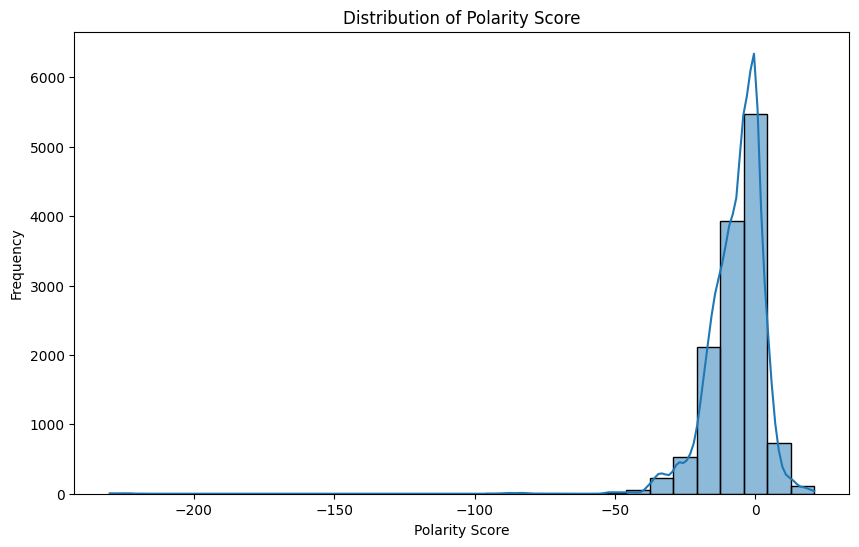

In [21]:
# Menampilkan distribusi polarity_score dengan histogram
plt.figure(figsize=(10, 6))
sns.histplot(clean_df['polarity_score'], bins=30, kde=True)
plt.title('Distribution of Polarity Score')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.show()

Menampilkan diagram lingkaran untuk memudahkan visualisasi pembagian dataset.

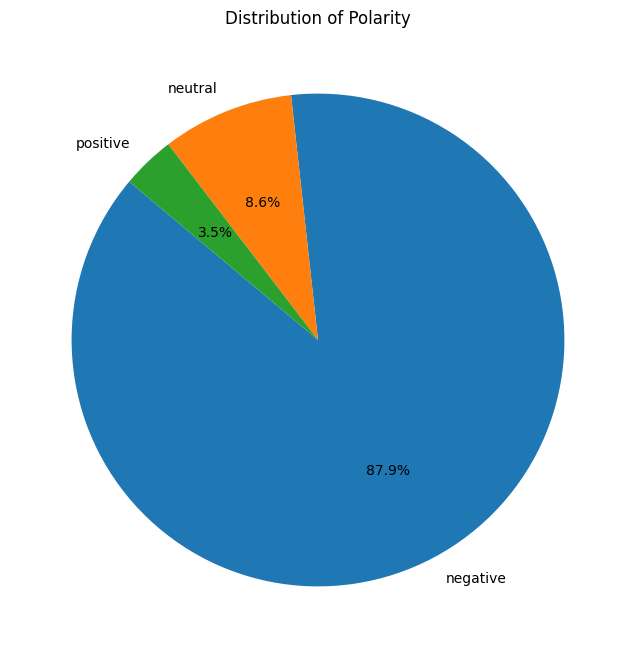

In [22]:
# Hitung jumlah masing-masing kategori polaritas
polarity_counts = clean_df['polarity'].value_counts()

# Menampilkan diagram lingkaran
plt.figure(figsize=(8, 8))
plt.pie(polarity_counts, labels=polarity_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Polarity')
plt.show()


## Word cloud Umum 
Untuk Membuat wordcloud dari dataset tanpa melihat label.

In [ ]:
# Membuat wordcloud secara umum

list_words = ''

for tweet in clean_df['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

## Word cloud positive
untuk Membuat wordcloud Positive dari dataset tanpa melihat label.

In [24]:
# Membuat dataframe untuk wordcloud positive
pd.set_option('display.max_colwidth', 3000)

positive_tweets = clean_df[clean_df['polarity'] == 'positive']
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)
positive_tweets = positive_tweets.reset_index(drop=True)
positive_tweets.index += 1

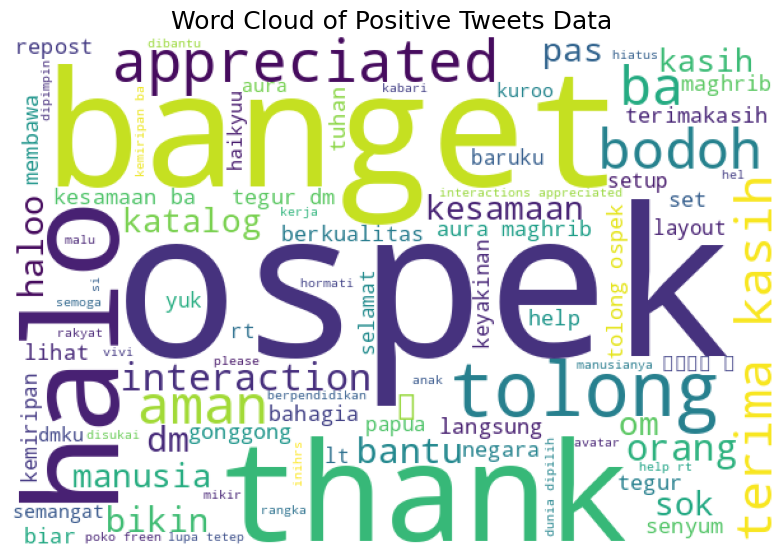

In [25]:
# Menampilkan wordcloud untuk label positive
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'positive_tweets'.
for tweet in positive_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Positive Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')

plt.show()

## Word cloud negative
untuk Membuat wordcloud negative dari dataset tanpa melihat label.

In [26]:
# Membuat dataframe untuk wordcloud negative
pd.set_option('display.max_colwidth', 3000)

negative_tweets = clean_df[clean_df['polarity'] == 'negative']
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=False)
negative_tweets = negative_tweets.reset_index(drop=True)
negative_tweets.index += 1

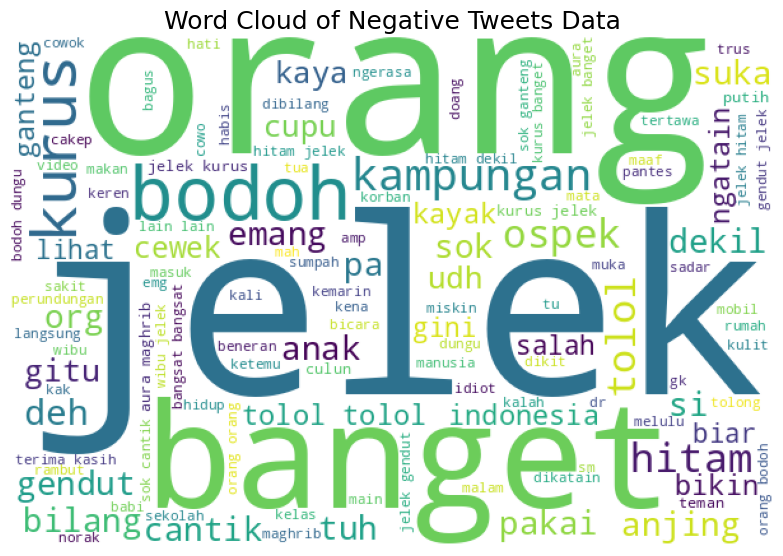

In [27]:
# Menampilkan wordcloud untuk label negative
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'negative_tweets'.
for tweet in negative_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Negative Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')

plt.show()

## word cloud neutral
untuk Membuat wordcloud Neutral dari dataset tanpa melihat label.

In [28]:
# Membuat dataframe untuk wordcloud neutral
pd.set_option('display.max_colwidth', 3000)

neutral_tweets = clean_df[clean_df['polarity'] == 'neutral']
neutral_tweets = neutral_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]
neutral_tweets = neutral_tweets.sort_values(by='polarity_score', ascending=False)
neutral_tweets = neutral_tweets.reset_index(drop=True)
neutral_tweets.index += 1

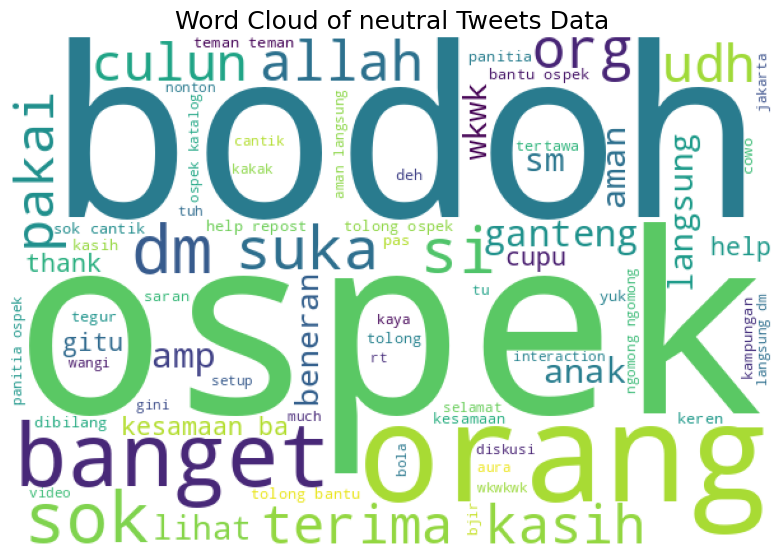

In [29]:
# Menampilkan wordcloud untuk label neutral
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'neutral_tweets'.
for tweet in neutral_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of neutral Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')

plt.show()

## Visualisasi dataset = Menampilkan distribusi dari panjang text.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


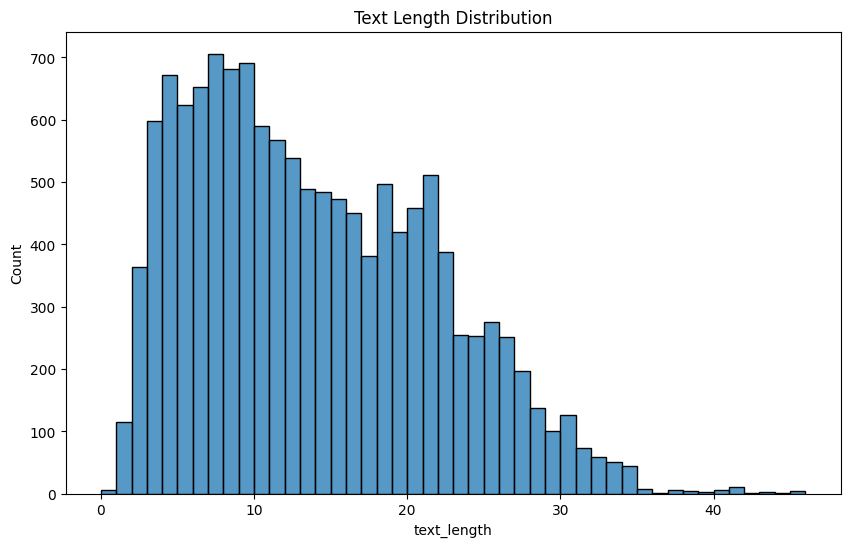

In [30]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Visualize text length distribution
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'])
plt.title('Text Length Distribution')
plt.show()

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

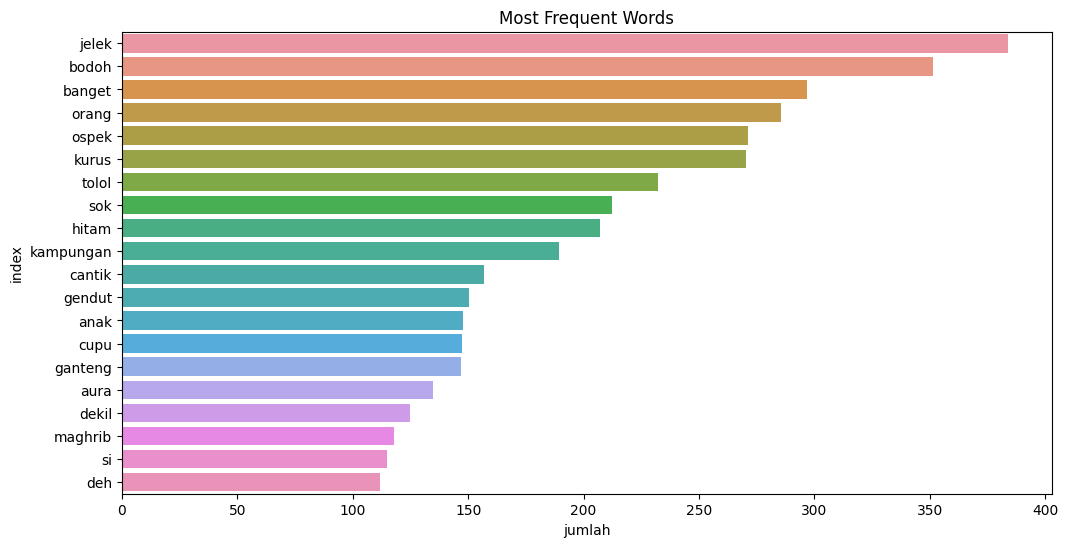

In [32]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Visualize most frequent words
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()

# Tahap Tokenisasi 

## Membagi kolom texs dijadikan sebagai fitur dan kolom polarity dijadikan sebagai target.

In [33]:
# Mengambil kolom text_akhir dan polarity
X = clean_df['teks']
y = clean_df['polarity']

In [34]:
y

0        negative
1        negative
2        negative
3        negative
4        negative
           ...   
13221    negative
13222    negative
13223    negative
13224    negative
13225    negative
Name: polarity, Length: 13218, dtype: object

In [35]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [36]:
# Tokenisasi
max_features = 2500
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(X.values)
X = tokenizer.texts_to_sequences(X.values)
X = pad_sequences(X)

# Label encoding
labelencoder = LabelEncoder()
integer_encoded = labelencoder.fit_transform(y)
y = to_categorical(integer_encoded)

# Menentukan jumlah kelas
num_classes = y.shape[1]

# Tahap Modeling

### Mendefinisikan callbacks yang akan berhenti jika nilai akurasi pelatihan lebi dari 0.93

In [37]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D, Conv1D, GlobalMaxPooling1D, Bidirectional, MaxPooling1D, Flatten, GRU, SimpleRNN
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Callback Kustom dengan minimal 10 epoch
class CustomCallback(tf.keras.callbacks.Callback):
    def __init__(self, min_epochs=10):
        super().__init__()
        self.min_epochs = min_epochs

    def on_epoch_end(self, epoch, logs=None):
        # Pastikan minimal epoch telah tercapai sebelum memeriksa val_accuracy
        if epoch + 1 >= self.min_epochs:
            if logs.get('val_accuracy') > 0.93:
                print(f"\nVal accuracy telah melebihi 0.93, menghentikan pelatihan pada epoch {epoch+1}")
                self.model.stop_training = True

early_stopping = CustomCallback(min_epochs=20)

### Pembuatan model dengan melakukan tiga percobaan skema pelatihan yang berbeda 
- Model 1
  - Algoritma Pelatihan: CNN - epochs=50
  - Pembagian Data: Training 65, val 15, test 20
- Model 2
  - Algoritma Pelatihan: LSTM epochs=40
  - Pembagian Data: Training 60, val 20, test 20
- Model 3
  - Algoritma Pelatihan: BiLSTM epochs=30
  - Pembagian Data: Training 60, val 20, test 20
- Model 4
  - Algoritma Pelatihan: GRU epochs=20
  - Pembagian Data: Training 65, val 15, test 20

## Model CNN

In [ ]:
# Memisahkan data latih, validasi, dan uji
X_train_val, X_test_CNN, y_train_val, y_test_CNN = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_CNN, X_val_CNN, y_train_CNN, y_val_CNN = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42)

# Membangun model CNN
model_CNN = Sequential()
model_CNN.add(Embedding(max_features, 512, input_length=X.shape[1]))
model_CNN.add(Conv1D(64, kernel_size=5, activation='relu'))
model_CNN.add(MaxPooling1D(pool_size=2))
model_CNN.add(Flatten())
model_CNN.add(Dense(64, activation='relu'))
model_CNN.add(Dropout(0.5))
model_CNN.add(Dense(num_classes, activation='softmax'))
model_CNN.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# Melatih model dengan early stopping kustom
batch_size = 24
history_CNN = model_CNN.fit(X_train_CNN, y_train_CNN, epochs=50, batch_size=batch_size, verbose=2, 
                            callbacks=[early_stopping], 
                            validation_data=(X_val_CNN, y_val_CNN))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/100
353/353 - 7s - 19ms/step - accuracy: 0.8769 - loss: 0.4786 - val_accuracy: 0.8785 - val_loss: 0.4137
Epoch 2/100
353/353 - 1s - 3ms/step - accuracy: 0.8846 - loss: 0.3449 - val_accuracy: 0.8960 - val_loss: 0.2718
Epoch 3/100
353/353 - 1s - 3ms/step - accuracy: 0.9243 - loss: 0.2013 - val_accuracy: 0.9300 - val_loss: 0.1845
Epoch 4/100
353/353 - 1s - 3ms/step - accuracy: 0.9482 - loss: 0.1381 - val_accuracy: 0.9381 - val_loss: 0.1572
Epoch 5/100
353/353 - 1s - 3ms/step - accuracy: 0.9644 - loss: 0.1069 - val_accuracy: 0.9485 - val_loss: 0.1344
Epoch 6/100
353/353 - 1s - 3ms/step - accuracy: 0.9743 - loss: 0.0801 - val_accuracy: 0.9556 - val_loss: 0.1187
Epoch 7/100
353/353 - 1s - 3ms/step - accuracy: 0.9806 - loss: 0.0669 - val_accuracy: 0.9683 - val_loss: 0.1026
Epoch 8/100
353/353 - 1s - 3ms/step - accuracy: 0.9858 - loss: 0.0489 - val_accuracy: 0.9712 - val_loss: 0.0952
Epoch 9/100
353/353 - 1s - 3ms/step - accuracy: 0.9892 - loss: 0.0383 - val_accuracy: 0.9764 - val_loss

In [39]:
# Evaluasi model
score_CNN, acc_CNN = model_CNN.evaluate(X_test_CNN, y_test_CNN, verbose=2)
print("Test score CNN: %.2f" % (score_CNN))
print("Test accuracy CNN: %.2f" % (acc_CNN))
# Menyimpan model
model_CNN.save('model_CNN.h5')

83/83 - 1s - 10ms/step - accuracy: 0.9716 - loss: 0.1573
Test score CNN: 0.16
Test accuracy CNN: 0.97


## Model 2 - LSTM

In [ ]:
# Memisahkan data latih, validasi, dan uji
X_train_val, X_test_LSTM, y_train_val, y_test_LSTM = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_LSTM, X_val_LSTM, y_train_LSTM, y_val_LSTM = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Membangun model LSTM
model_LSTM = Sequential()
model_LSTM.add(Embedding(max_features, 256, input_length=X.shape[1]))
model_LSTM.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=l2(0.01), return_sequences=True))
model_LSTM.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=l2(0.01)))
model_LSTM.add(Dense(128, activation='relu'))
model_LSTM.add(Dense(64, activation='relu'))
model_LSTM.add(Dense(num_classes, activation='softmax'))
model_LSTM.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# Melatih model dengan early stopping kustom
batch_size = 32
history_LSTM = model_LSTM.fit(X_train_LSTM, y_train_LSTM, epochs=40, batch_size=batch_size, verbose=2, 
                              callbacks=[early_stopping], 
                              validation_data=(X_val_LSTM, y_val_LSTM))

Epoch 1/100
265/265 - 47s - 177ms/step - accuracy: 0.8794 - loss: 4.0578 - val_accuracy: 0.8785 - val_loss: 2.7287
Epoch 2/100
265/265 - 39s - 145ms/step - accuracy: 0.8799 - loss: 1.9717 - val_accuracy: 0.8785 - val_loss: 1.3826
Epoch 3/100
265/265 - 39s - 146ms/step - accuracy: 0.8917 - loss: 1.0029 - val_accuracy: 0.9012 - val_loss: 0.7107
Epoch 4/100
265/265 - 40s - 150ms/step - accuracy: 0.9226 - loss: 0.5310 - val_accuracy: 0.9225 - val_loss: 0.4116
Epoch 5/100
265/265 - 39s - 147ms/step - accuracy: 0.9410 - loss: 0.3214 - val_accuracy: 0.9480 - val_loss: 0.2844
Epoch 6/100
265/265 - 39s - 147ms/step - accuracy: 0.9560 - loss: 0.2250 - val_accuracy: 0.9513 - val_loss: 0.2152
Epoch 7/100
265/265 - 39s - 146ms/step - accuracy: 0.9629 - loss: 0.1760 - val_accuracy: 0.9579 - val_loss: 0.1808
Epoch 8/100
265/265 - 39s - 146ms/step - accuracy: 0.9671 - loss: 0.1479 - val_accuracy: 0.9589 - val_loss: 0.1666
Epoch 9/100
265/265 - 39s - 146ms/step - accuracy: 0.9735 - loss: 0.1258 - val_a

In [41]:
# Evaluasi model
score_LSTM, acc_LSTM = model_LSTM.evaluate(X_test_LSTM, y_test_LSTM, verbose=2)
print("Test score LSTM: %.2f" % (score_LSTM))
print("Test accuracy LSTM: %.2f" % (acc_LSTM))
# Menyimpan model
model_LSTM.save('model_LSTM.h5')

83/83 - 3s - 33ms/step - accuracy: 0.9743 - loss: 0.1147
Test score LSTM: 0.11
Test accuracy LSTM: 0.97


## Model 3 - BiLSTM

In [ ]:
# Memisahkan data latih, validasi, dan uji
X_train_val, X_test_BiLSTM, y_train_val, y_test_BiLSTM = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_BiLSTM, X_val_BiLSTM, y_train_BiLSTM, y_val_BiLSTM = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Import library tambahan
from transformers import TFAutoModel, AutoTokenizer
from tensorflow.keras.layers import Bidirectional

# BiLSTM
model_BiLSTM = Sequential()
model_BiLSTM.add(Embedding(max_features, 256, input_length=X.shape[1]))
model_BiLSTM.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=l2(0.01), return_sequences=True)))
model_BiLSTM.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=l2(0.01))))
model_BiLSTM.add(Dense(128, activation='relu'))
model_BiLSTM.add(Dense(64, activation='relu'))
model_BiLSTM.add(Dense(num_classes, activation='softmax'))
model_BiLSTM.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

history_BiLSTM = model_BiLSTM.fit(X_train_BiLSTM, y_train_BiLSTM, epochs=30, batch_size=batch_size, verbose=2, 
                                  callbacks=[early_stopping], 
                                  validation_data=(X_val_BiLSTM, y_val_BiLSTM))

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


265/265 - 74s - 278ms/step - accuracy: 0.8667 - loss: 8.6376 - val_accuracy: 0.8785 - val_loss: 5.5497
Epoch 2/100
265/265 - 67s - 252ms/step - accuracy: 0.8862 - loss: 3.7895 - val_accuracy: 0.8879 - val_loss: 2.4675
Epoch 3/100
265/265 - 81s - 307ms/step - accuracy: 0.9076 - loss: 1.7107 - val_accuracy: 0.9106 - val_loss: 1.1470
Epoch 4/100
265/265 - 66s - 251ms/step - accuracy: 0.9228 - loss: 0.8331 - val_accuracy: 0.9187 - val_loss: 0.6429
Epoch 5/100
265/265 - 67s - 252ms/step - accuracy: 0.9355 - loss: 0.4884 - val_accuracy: 0.9125 - val_loss: 0.4470
Epoch 6/100
265/265 - 66s - 251ms/step - accuracy: 0.9366 - loss: 0.3518 - val_accuracy: 0.9277 - val_loss: 0.3360
Epoch 7/100
265/265 - 66s - 251ms/step - accuracy: 0.9449 - loss: 0.2788 - val_accuracy: 0.9281 - val_loss: 0.2988
Epoch 8/100
265/265 - 67s - 251ms/step - accuracy: 0.9463 - loss: 0.2437 - val_accuracy: 0.9310 - val_loss: 0.2809
Epoch 9/100
265/265 - 67s - 252ms/step - accuracy: 0.9521 - loss: 0.2206 - val_accuracy: 0.9

In [43]:
# Evaluasi model
score_BiLSTM, acc_BiLSTM = model_BiLSTM.evaluate(X_test_BiLSTM, y_test_BiLSTM, verbose=2)
print("Test score BiLSTM: %.2f" % (score_BiLSTM))
print("Test accuracy BiLSTM: %.2f" % (acc_BiLSTM))

# Menyimpan model
model_BiLSTM.save('model_BiLSTM.h5')

83/83 - 4s - 51ms/step - accuracy: 0.9682 - loss: 0.1770
Test score BiLSTM: 0.18
Test accuracy BiLSTM: 0.97


## Model 4 - GRU

In [ ]:
# Memisahkan data latih, validasi, dan uji
X_train_val, X_test_GRU, y_train_val, y_test_GRU = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_GRU, X_val_GRU, y_train_GRU, y_val_GRU = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42)

# Membangun model GRU
model_GRU = Sequential()
model_GRU.add(Embedding(max_features, 512, input_length=X.shape[1]))
model_GRU.add(SpatialDropout1D(0.3))
model_GRU.add(Bidirectional(GRU(64, return_sequences=True)))
model_GRU.add(Bidirectional(GRU(128, return_sequences=False)))
model_GRU.add(Dense(128, activation='relu',kernel_regularizer=l2(0.01)))
model_GRU.add(Dropout(0.5))
model_GRU.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model_GRU.add(Dropout(0.5))
model_GRU.add(Dense(num_classes, activation='softmax'))
model_GRU.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# Melatih model dengan early stopping kustom
batch_size = 32
history_GRU = model_GRU.fit(X_train_GRU, y_train_GRU, epochs=20, batch_size=batch_size, verbose=2, validation_data=(X_val_GRU, y_val_GRU)
                            , callbacks=[early_stopping]
                           )

Epoch 1/100
265/265 - 9s - 36ms/step - accuracy: 0.8637 - loss: 2.5888 - val_accuracy: 0.8785 - val_loss: 2.0081
Epoch 2/100
265/265 - 5s - 20ms/step - accuracy: 0.8836 - loss: 1.6527 - val_accuracy: 0.8974 - val_loss: 1.2560
Epoch 3/100
265/265 - 5s - 20ms/step - accuracy: 0.9297 - loss: 1.0131 - val_accuracy: 0.9296 - val_loss: 0.8283
Epoch 4/100
265/265 - 5s - 20ms/step - accuracy: 0.9459 - loss: 0.6791 - val_accuracy: 0.9352 - val_loss: 0.5962
Epoch 5/100
265/265 - 5s - 20ms/step - accuracy: 0.9501 - loss: 0.4913 - val_accuracy: 0.9390 - val_loss: 0.4384
Epoch 6/100
265/265 - 5s - 20ms/step - accuracy: 0.9528 - loss: 0.3688 - val_accuracy: 0.9400 - val_loss: 0.3467
Epoch 7/100
265/265 - 5s - 20ms/step - accuracy: 0.9553 - loss: 0.2892 - val_accuracy: 0.9400 - val_loss: 0.2909
Epoch 8/100
265/265 - 5s - 19ms/step - accuracy: 0.9578 - loss: 0.2398 - val_accuracy: 0.9433 - val_loss: 0.2504
Epoch 9/100
265/265 - 5s - 20ms/step - accuracy: 0.9573 - loss: 0.2051 - val_accuracy: 0.9414 - 

In [45]:
# Evaluasi model
score_GRU, acc_GRU = model_GRU.evaluate(X_test_GRU, y_test_GRU, verbose=2)
print("Test score GRU: %.2f" % (score_GRU))
print("Test accuracy GRU: %.2f" % (acc_GRU))
# Menyimpan model
model_GRU.save('model_GRU.h5')

83/83 - 1s - 7ms/step - accuracy: 0.9796 - loss: 0.1090
Test score GRU: 0.11
Test accuracy GRU: 0.98


## Evaluasi model

In [46]:
# Perbaikan DataFrame hasil evaluasi model
import pandas as pd

results_df = pd.DataFrame({
    'Model': ['CNN', 'LSTM', 'BiLSTM', 'GRU'],
    'Accuracy Train': [
        history_CNN.history['accuracy'][-1], 
        history_LSTM.history['accuracy'][-1],  
        history_BiLSTM.history['accuracy'][-1], 
        history_GRU.history['accuracy'][-1]
    ],
    'Accuracy Test': [acc_CNN, acc_LSTM, acc_BiLSTM, acc_GRU]
})

print(results_df)

    Model  Accuracy Train  Accuracy Test
0     CNN        0.996572       0.971634
1    LSTM        0.987469       0.974281
2  BiLSTM        0.981558       0.968230
3     GRU        0.989952       0.979576


# Predict

In [49]:
from transformers import BertTokenizerFast
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np


In [50]:
# Prediksi dengan Data Baru
new_texts = [
    "alhamdulillah bersyukur bahagia Terimakasih Hari ini terbaik happy fav banget Mencinta dan senang selalu  ",
    "fakultas unj teknik investigasi pendalaman informasi positif rektorat tambahan dugaan ospek lancar",
    "hitam jelek wasit ngaca kambing wasit performa jelek cnyalain mimpi lawan ketinggian bodoh"
]

# Nilai labeling Awal dari data
true_labels = ["positive", "neutral", "negative"]

# Tokenisasi Data Baru
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_padded_sequences = pad_sequences(new_sequences, maxlen=X.shape[1])

# Membuat prediksi menggunakan 4 model
predictions_CNN = model_CNN.predict(new_padded_sequences)
predictions_LSTM = model_LSTM.predict(new_padded_sequences)
predictions_BiLSTM = model_BiLSTM.predict(new_padded_sequences)
predictions_GRU = model_GRU.predict(new_padded_sequences)

# Mengubah prediksi menjadi label
predicted_labels_CNN = np.argmax(predictions_CNN, axis=1)
predicted_labels_LSTM = np.argmax(predictions_LSTM, axis=1)
predicted_labels_BiLSTM = np.argmax(predictions_BiLSTM, axis=1)
predicted_labels_GRU = np.argmax(predictions_GRU, axis=1)

# Label Encoder
predicted_labels_LSTM = labelencoder.inverse_transform(predicted_labels_LSTM)
predicted_labels_CNN = labelencoder.inverse_transform(predicted_labels_CNN)
predicted_labels_GRU = labelencoder.inverse_transform(predicted_labels_GRU)
predicted_labels_BiLSTM = labelencoder.inverse_transform(predicted_labels_BiLSTM)

# Menampilkan hasil prediksi dari semua model
for text, true_label, label_LSTM, label_CNN, label_GRU, label_BiLSTM in zip(
        new_texts, true_labels, predicted_labels_LSTM, predicted_labels_CNN, 
        predicted_labels_GRU, predicted_labels_BiLSTM):
    print(f"📌 **Text:** {text}\n"
          f"✅ **True Label:** {true_label}\n"
          f"🔹 **Predicted Label (CNN):** {label_CNN}\n"
          f"🔹 **Predicted Label (LSTM):** {label_LSTM}\n"
          f"🔹 **Predicted Label (BiLSTM):** {label_BiLSTM}\n"
          f"🔹 **Predicted Label (GRU):** {label_GRU}\n"
          f"{'-'*60}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
📌 **Text:** alhamdulillah bersyukur bahagia Terimakasih Hari ini terbaik happy fav banget Mencinta dan senang selalu  
✅ **True Label:** positive
🔹 **Predicted Label (CNN):** positive
🔹 **Predicted Label (LSTM):** positive
🔹 **Predicted Label (BiLSTM):** positive
🔹 **Predicted Label (GRU):** positive
------------------------------------------------------------

📌 **Text:** fakultas unj teknik investigasi pendalaman informasi positif rektorat tambahan dugaan ospek lancar
✅ **True Label:** neutral
🔹 **Predicted Label (CNN):** neutral
🔹 **Predicted Label (LSTM):** neutral
🔹 **Predicted Label (BiLSTM):** neutral
🔹 **Predicted Label (GRU):** neutral
------------------------------------------------------------

📌 **Text:** hitam jelek wasit ngaca kambing wasit performa jelek cnyalain mimpi lawan ketinggian bodoh
✅ **True Label:** negative
